In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

C:\Users\TUSHAR\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
con=sqlite3.connect("database.sqlite")

In [4]:
filtered_data=pd.read_sql_query("""select * from Reviews where Score!=3 LIMIT 5000""",con)

In [5]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
def partition(x):
    if x<3:
        return 0
    return 1


In [7]:
actualScore=filtered_data["Score"]
positiveNegative=actualScore.map(partition)

In [8]:
filtered_data["Score"]=positiveNegative

In [9]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
display=pd.read_sql_query("""
select UserId,ProductId,ProfileName,Time,Score,Text,Count(*)
from Reviews 
GROUP BY UserId
HAVING COUNT(*)>1
""",con)

In [11]:
print(display.shape)
display.head()

(80668, 7)


,UserId,ProductId,ProfileName,Time,Score,Text,Count(*)
0,#oc-R115TNMSPFT9I7,B007Y59HVM,Breyton,1331510400,2,Overall its just OK when considering the price...,2
1,#oc-R11D9D7SHXIJB9,B005HG9ET0,"Louis E. Emory ""hoppy""",1342396800,5,"My wife has recurring extreme muscle spasms, u...",3
2,#oc-R11DNU2NBKQ23Z,B007Y59HVM,Kim Cieszykowski,1348531200,1,This coffee is horrible and unfortunately not ...,2
3,#oc-R11O5J5ZVQE25C,B005HG9ET0,Penguin Chick,1346889600,5,This will be the bottle that you grab from the...,3
4,#oc-R12KPBODL2B5ZD,B007OSBE1U,Christopher P. Presta,1348617600,1,I didnt like this coffee. Instead of telling y...,2


In [12]:
display[display["UserId"]=="AZY10LLTJ71NX"]

,UserId,ProductId,ProfileName,Time,Score,Text,Count(*)
80638,AZY10LLTJ71NX,B006P7E5ZI,"undertheshrine ""undertheshrine""",1334707200,5,I was recommended to try green tea extract to ...,5


# Data Cleaning : Deduplication

In [13]:
display=pd.read_sql_query("""
select * from Reviews where UserId="AR5J8UI46CURR"
Order By ProductId
""",con)

In [14]:
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [14]:
#Sorting data according to ProductID in ascending order

In [15]:
sorted_data=filtered_data.sort_values('ProductId',axis=0,inplace=False,ascending=True,kind='quicksort',na_position='last')

In [16]:
#Deduplication Of Entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first",inplace=False)

final.shape

(4986, 10)

In [17]:
#checking to see how much % of data still remains

(final["Id"].size*1.0)/(filtered_data["Id"].size*1.0)*100

99.72

# Observation:It was also seen that in two rows given below the value of HelpfulnessNumerator is greater 
than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions

In [18]:
display=pd.read_sql_query("""
select * from Reviews where 
Score!=3 AND Id=44737 OR ID =64422
Order By ProductId

""",con)

In [19]:
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [20]:
final=final[final["HelpfulnessNumerator"]<=final["HelpfulnessDenominator"]]

In [21]:
print(final.shape)

(4986, 10)


In [22]:
final["Score"].value_counts()

1    4178
0     808
Name: Score, dtype: int64

In [23]:
#printing some random reviews
sent_0=final["Text"].values[0]
print(sent_0)
print("="*100)
sent_100=final["Text"].values[100]
print(sent_100)
print("="*100)
sent_500=final["Text"].values[500]
print(sent_500)
print("="*100)
sent_1500=final["Text"].values[1500]
print(sent_1500)
print("="*100)
sent_4900=final["Text"].values[4900]
print(sent_4900)
print("="*100)

Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
Although this seems like a great product it is definitely not minced.  The cans say it is minced but it isn't, it is ground beef.  My cat ONLY likes minced.  Not chunks, not ground.  Although she will eat ground cat food sometimes, it has to be inviting and delicious, yet she just walks away from this.<br /><br />I hate it when the packaging lies about the contents of a product.  The shipping was speedy and the value is great (as long as they deliver what the promise) now I am stuck with food my cat wont eat at all.
This is a very good snack that I feel great about offering my 10 month old.  She can easily  pick up the small pieces and definitely enjoys the apple cinnamon taste.  My 5 year old loves them as well!  I would d

In [24]:
#remove url from text
sent_0=re.sub(r"http\S+","",sent_0)
sent_100=re.sub(r"http\S+","",sent_100)
sent_500=re.sub(r"http\S+","",sent_500)
sent_4900=re.sub(r"http\S+","",sent_4900)

In [25]:
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [26]:
from bs4 import BeautifulSoup

In [27]:
soup=BeautifulSoup(sent_0,'lxml')
text=soup.get_text()
print(text)
print("="*100)

soup=BeautifulSoup(sent_100,'lxml')
text=soup.get_text()
print(text)
print("="*100)

soup=BeautifulSoup(sent_500,'lxml')
text=soup.get_text()
print(text)
print("="*100)

soup=BeautifulSoup(sent_4900,'lxml')
text=soup.get_text()
print(text)

Why is this $[...] when the same product is available for $[...] here? />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
Although this seems like a great product it is definitely not minced.  The cans say it is minced but it isn't, it is ground beef.  My cat ONLY likes minced.  Not chunks, not ground.  Although she will eat ground cat food sometimes, it has to be inviting and delicious, yet she just walks away from this.I hate it when the packaging lies about the contents of a product.  The shipping was speedy and the value is great (as long as they deliver what the promise) now I am stuck with food my cat wont eat at all.
This is a very good snack that I feel great about offering my 10 month old.  She can easily  pick up the small pieces and definitely enjoys the apple cinnamon taste.  My 5 year old loves them as well!  I would definitely recommend these to anyone with small (or larger) kids.  :)
love to order my coffee

In [28]:
def decontracted(phrase):
    #specific
    phrase = re.sub(r"won't","will not",phrase)
    phrase = re.sub(r"can\'t","can not",phrase)
    
    #general
    phrase = re.sub(r"n\'t"," not",phrase)
    phrase = re.sub(r"\'re"," are",phrase)
    phrase = re.sub(r"\'s"," is",phrase)
    phrase = re.sub(r"\'d"," would",phrase)
    phrase = re.sub(r"\'ve"," have",phrase)
    phrase = re.sub(r"\'ll"," will",phrase)
    phrase = re.sub(r"\'m"," am",phrase)
    phrase = re.sub(r"\'t"," not",phrase)
    return phrase

In [29]:
sent_100=decontracted(sent_1500)
print(sent_100)

Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I am sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you do not like that combination, do not order this type of cookie.  I find the combo quite nice, really.  The oatmeal sort of "calms" the rich chocolate flavor and gives the cookie sort of a coconut-type consistency.  Now let is also remember that tastes differ; so, I have given my opinion.<br /><br />Then, these are soft, chewy cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say "crispy," rather than "chewy."  I happen to like raw cookie dough; however, I do not see where these taste like raw cookie dough.  Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  They are not individually wrapped, which would add to the cost.  Oh y

In [30]:
#remove words with numbers
sent_0 = re.sub("\S*\d\S*", "",sent_0)
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor  and  traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [31]:
#remove special characters
sent_1500 = re.sub('[^A-Za-z0-9]+',' ',sent_1500)
print(sent_1500)

Wow So far two two star reviews One obviously had no idea what they were ordering the other wants crispy cookies Hey I m sorry but these reviews do nobody any good beyond reminding us to look before ordering br br These are chocolate oatmeal cookies If you don t like that combination don t order this type of cookie I find the combo quite nice really The oatmeal sort of calms the rich chocolate flavor and gives the cookie sort of a coconut type consistency Now let s also remember that tastes differ so I ve given my opinion br br Then these are soft chewy cookies as advertised They are not crispy cookies or the blurb would say crispy rather than chewy I happen to like raw cookie dough however I don t see where these taste like raw cookie dough Both are soft however so is this the confusion And yes they stick together Soft cookies tend to do that They aren t individually wrapped which would add to the cost Oh yeah chocolate chip cookies tend to be somewhat sweet br br So if you want somet

In [32]:
## https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

In [33]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [34]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentence in tqdm(final['Text'].values):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    # https://gist.github.com/sebleier/554280
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentence.strip())

100%|████████████████████████████████████████████████████████████████████████████| 4986/4986 [00:02<00:00, 1923.28it/s]


In [35]:
preprocessed_reviews[1500]

'wow far two two star reviews one obviously no idea ordering wants crispy cookies hey sorry reviews nobody good beyond reminding us look ordering chocolate oatmeal cookies not like combination not order type cookie find combo quite nice really oatmeal sort calms rich chocolate flavor gives cookie sort coconut type consistency let also remember tastes differ given opinion soft chewy cookies advertised not crispy cookies blurb would say crispy rather chewy happen like raw cookie dough however not see taste like raw cookie dough soft however confusion yes stick together soft cookies tend not individually wrapped would add cost oh yeah chocolate chip cookies tend somewhat sweet want something hard crisp suggest nabiso ginger snaps want cookie soft chewy tastes like combination chocolate oatmeal give try place second order'

# FEATURIZATION

# Bag Of Words

In [36]:
count_vect=CountVectorizer()

In [37]:
count_vect.fit(preprocessed_reviews)
print(type(count_vect))


<class 'sklearn.feature_extraction.text.CountVectorizer'>


In [38]:
print("some feature names",count_vect.get_feature_names()[:10])
print("="*50)

some feature names ['aa', 'aahhhs', 'aback', 'abandon', 'abates', 'abbott', 'abby', 'abdominal', 'abiding', 'ability']


In [39]:
final_counts=count_vect.transform(preprocessed_reviews)
print("The type of count vectorizer is:", type(final_counts))
print("The shape of out text BOW vectorizer",final_counts.shape)
print("The number of unique words", final_counts.get_shape()[1])

The type of count vectorizer is: <class 'scipy.sparse.csr.csr_matrix'>
The shape of out text BOW vectorizer (4986, 12997)
The number of unique words 12997


In [62]:
type(final_counts)

scipy.sparse.csr.csr_matrix

In [63]:
final_counts.shape

(4986, 12997)

# Bi-Grams And n-Gram

In [40]:
count_vect=CountVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
final_bigram_counts=count_vect.fit_transform(preprocessed_reviews)
print("The type of count vectorizer is:", type(final_bigram_counts))
print("The shape of out text BOW vectorizer",final_bigram_counts.shape)
print("The number of unique words including both unigram and bigram is:", final_bigram_counts.get_shape()[1])

The type of count vectorizer is: <class 'scipy.sparse.csr.csr_matrix'>
The shape of out text BOW vectorizer (4986, 3144)
The number of unique words including both unigram and bigram is: 3144


In [ ]:
df=pd.DataFrame(np.array(preprocessed_reviews).reshape(-1,1),columns=["Preprocessed_Text"])
df.head()

In [ ]:
#Adding text after preprocessign in the dataset
final["Text"]=df["Preprocessed_Text"] #replacing text of final dataset with preprocessed_text after
final.head()

In [ ]:
#converting vector into standardized data
from sklearn.preprocessing import StandardScaler

std_preprocessed_text=StandardScaler(with_mean=False).fit_transform(final_bigram_counts)

std_preprocessed_text.shape

In [ ]:
#convert sparse matrix into dense matrix as tsne takes dense matrix


std_data=std_preprocessed_text.todense()
type(std_data)

In [ ]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=30,n_iter=5000)

tsne_data=model.fit_transform(std_data)

In [ ]:
tsne_data=np.vstack((tsne_data.T,final["Score"])).T
tsne_df=pd.DataFrame(tsne_data,columns=("Dim_1","Dim_2","Score"))

In [102]:
sns.FacetGrid(tsne_df,hue="Score",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()

plt.title("TSNE For Bag Of Words")

#legend
0 - Negative reviews
1-  Positive reviews

SyntaxError: invalid syntax (<ipython-input-102-dc1bb8def9c0>, line 6)

# TFIDF

In [41]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_vect.fit(preprocessed_reviews)

final_tf_idf=tf_idf_vect.transform(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print("The type of count vectorizer is:", type(final_tf_idf))
print("The shape of out text TFIDF vectorizer",final_tf_idf.get_shape())
print("The number of unique words including both unigram and bigram is:", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['ability', 'able', 'able find', 'able get', 'absolute', 'absolutely', 'absolutely delicious', 'absolutely love', 'absolutely no', 'according']
The type of count vectorizer is: <class 'scipy.sparse.csr.csr_matrix'>
The shape of out text TFIDF vectorizer (4986, 3144)
The number of unique words including both unigram and bigram is: 3144


In [99]:
from sklearn.preprocessing import StandardScaler

tfidf_std_preprocessed=StandardScaler(with_mean=False).fit_transform(final_tf_idf)

tfidf_std_preprocessed.shape

(4986, 3144)

In [100]:
print(type(tfidf_std_preprocessed))

#converting sparse matrix into dense matrix as TSNE takes dense matrix

tfidf_std_data=tfidf_std_preprocessed.todense()

<class 'scipy.sparse.csr.csr_matrix'>


In [106]:
model=TSNE(n_components=2,perplexity=50,n_iter=5000)

tsne_data_tfidf=model.fit_transform(tfidf_std_data)

In [107]:
tsne_data_tfidf=np.vstack((tsne_data_tfidf.T,final["Score"])).T

(4986, 3)


C:\Users\a1adpppz\AppData\Local\Continuum\anaconda3_1\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


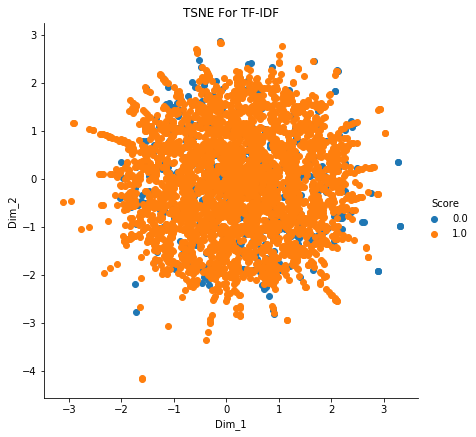

In [108]:
print(tsne_data_tfidf.shape)
tsne_tfidf_df = pd.DataFrame(data=tsne_data_tfidf,columns=("Dim_1","Dim_2","Score"))
sns.FacetGrid(tsne_tfidf_df,hue="Score",size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()

plt.title("TSNE For TF-IDF")
plt.show()

# Word2Vec

In [42]:
i=0
list_of_sentence=[]
for sentence in preprocessed_reviews:
    list_of_sentence.append(sentence.split())

In [43]:
list_of_sentence[1]

['used',
 'victor',
 'fly',
 'bait',
 'seasons',
 'ca',
 'not',
 'beat',
 'great',
 'product']

In [44]:
preprocessed_reviews

['product available victor traps unreal course total fly genocide pretty stinky right nearby',
 'used victor fly bait seasons ca not beat great product',
 'received shipment could hardly wait try product love slickers call instead stickers removed easily daughter designed signs printed reverse use car windows printed beautifully print shop program going lot fun product windows everywhere surfaces like tv screens computer monitors',
 'really good idea final product outstanding use decals car window everybody asks bought decals made two thumbs',
 'glad cocker standard poodle puppy loves stuff trust brand superior nutrition compare labels previous feed pedigree mostly corn little dude healthy happy high energy glossy coat also superior nutrition produces smaller compact stools',
 'using food months find excellent fact two dogs coton de tulear standard poodle puppy love food thriving coats excellent condition overall structure perfect good tasting dog good good deal owner around best food 